# **Project Name**    - Yes_Bank_Closing_Price_Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** SONKAR ABHISHEK
##### **Team Member 2 -** GOURAV PATIL
##### **Team Member 3 -** AKSHAY PAWAR
##### **Team Member 4 -** RITESH NEULKAR
##### **Team Member 5 -** KEVIN VARSANI

# **Project Summary -**

1) Data Cleaning :-

 Dealing with null values, duplicate data and outliers present in our data.

2) Exploratory Data Analysis :-

 Plotting the dependent variable and distributions of dependent and independent variables.

 Checking and visualizing the correlation between our dependent and independent variables.

 Visualizing the relationship between each pair of our variables.

3) Data Preprocessing & Feature Engineering :-

time series train test

 Scaling the data and splitting it into train and test sets.

4) Model Implementation :-

Fitting various models on our data and optimizing them via cross-validation.

Using these models to make predictions on test and train data.

5) Data Visualization :-

Using several kinds of charts like Line chart, scatter plot, heatmap, pair plot, distplot, boxplot etc to better visualize data and understand correlation and trends.

6) Model performance comparison :-

Comparison of all implemented models using various Regression evaluation metrics like Mean absolute error, Mean squared error, RMSE, R-squared and Adjusted R-squared.

7) Conclusion


# **GitHub Link -**

https://github.com/abhi14062000/machine-learning---regression

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
from sklearn.pipeline import Pipeline
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from sklearn.metrics import (r2_score,               
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)
from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV 
import numpy as np
import seaborn as sns
from scipy.stats import *
import math
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
from sklearn import linear_model, neighbors
from sklearn.model_selection import train_test_split, cross_val_predict, TimeSeriesSplit, KFold, cross_val_score
import plotly.express as px
!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.1/571.1 KB 11.9 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML REGRESSION/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info

<bound method DataFrame.info of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])


0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


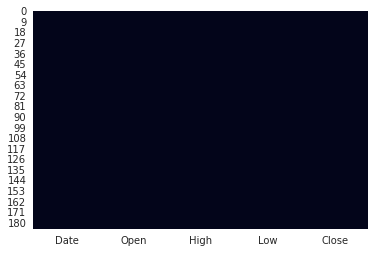

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

**ANS-** 

We have a total of 185 entries.

No null values.

Date column is of 'object' datatype we have to convert it to 'datetime'.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
df.describe

<bound method NDFrame.describe of                  Date   Open   High    Low  Close    OHL
Date                                                    
2005-07-01 2005-07-01  13.00  14.00  11.25  12.46  12.75
2005-08-01 2005-08-01  12.58  14.88  12.55  13.42  13.34
2005-09-01 2005-09-01  13.48  14.87  12.27  13.30  13.54
2005-10-01 2005-10-01  13.20  14.47  12.40  12.99  13.36
2005-11-01 2005-11-01  13.35  13.88  12.88  13.41  13.37
...               ...    ...    ...    ...    ...    ...
2020-07-01 2020-07-01  25.60  28.30  11.10  11.95  21.67
2020-08-01 2020-08-01  12.00  17.16  11.85  14.37  13.67
2020-09-01 2020-09-01  14.30  15.34  12.75  13.15  14.13
2020-10-01 2020-10-01  13.30  14.01  12.11  12.42  13.14
2020-11-01 2020-11-01  12.41  14.90  12.21  14.67  13.17

[185 rows x 6 columns]>

### Variables Description 

**ANS-**  

**Date :** date of the stocks price

**Open :** opening of the stock after stock trading start

**High :** highest price of the stock

**Low :** lowest price of the stock

**Close :** closing price of the stock after day end 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

### What all manipulations have you done and insights you found?

**ANS-**.  Date column is of 'object' datatype we have converted it to 'datetime'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

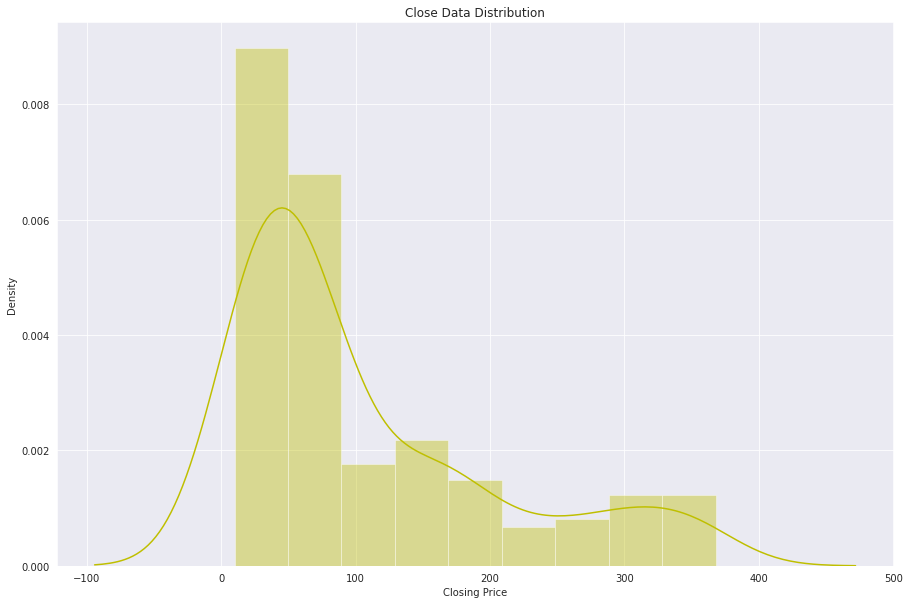

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,10))
sns.distplot(df['Close'],color="y")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

**ANS-**. for analyzing density of the closing price of stock 





##### 2. What is/are the insight(s) found from the chart?

**ANS-** stock price has been down most of the time during closing

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
fig = px.line(df, df['Date'], df['Close'], title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

##### 1. Why did you pick the specific chart?

**ANS-**. for analyzing closing price of stock at different date

##### 2. What is/are the insight(s) found from the chart?

**ANS-** price has been increased every year till 2018 after 2018 it has been going down. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**ANS-** if you want profit u can trade with yes bank stock but for long term holding

#### Chart - 3

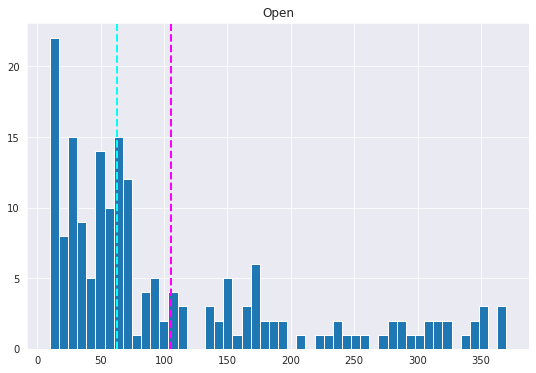

In [ ]:
# Chart - 3 visualization code
# Check for skewness in the open and close
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Open']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Open')
plt.show()

##### 1. Why did you pick the specific chart?

**ANS-**.  checking for skewness in the open and close

##### 2. What is/are the insight(s) found from the chart?

**ANS-** median is less then mean

#### Chart - 4

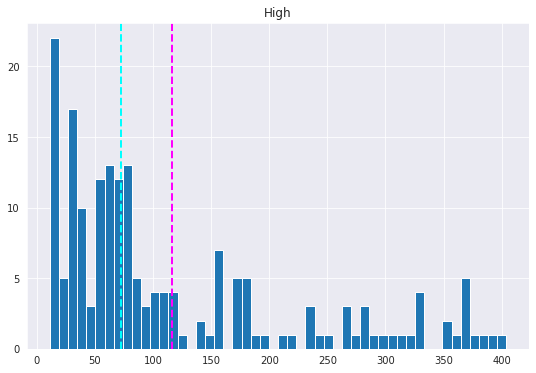

In [ ]:
# Chart - 4 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['High']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('High')
plt.show()


##### 1. Why did you pick the specific chart?

**ANS-**. checking for skewness in the high and close

##### 2. What is/are the insight(s) found from the chart?

**ANS-** median is less then mean

#### Chart - 5

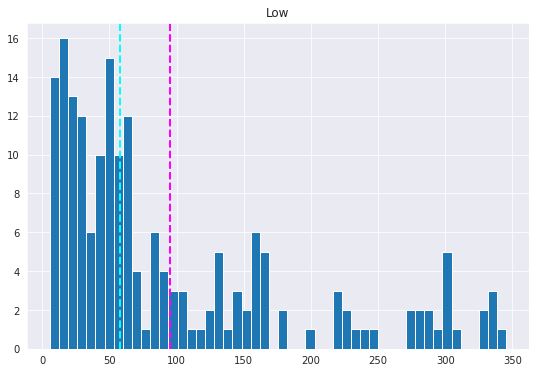

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Low']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Low')
plt.show()


##### 1. Why did you pick the specific chart?

**ANS-**. checking for skewness in the low and close 

##### 2. What is/are the insight(s) found from the chart?

**ANS-** median is less then mean 

#### Chart - 6

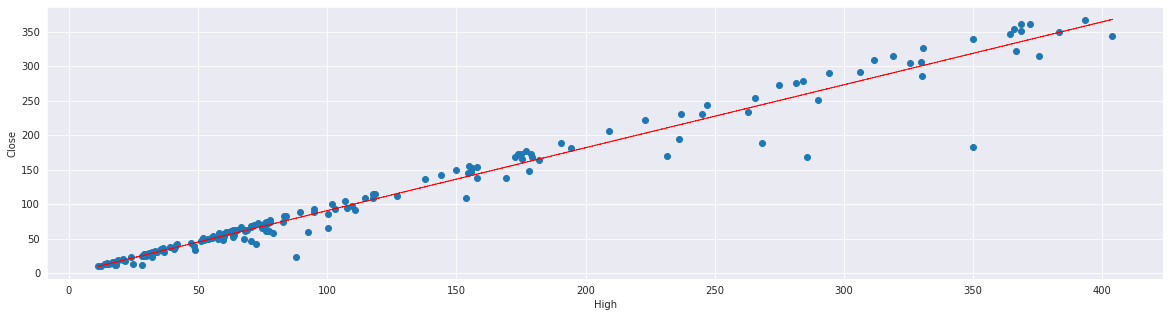

In [ ]:
# Chart - 6 visualization code
# scatter plot to see the relationship between high & close variables
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(df['High'], df['Close'])
plt.xlabel('High')
plt.ylabel('Close')
z = np.polyfit(df['High'], df['Close'], 1)
y_hat = np.poly1d(z)(df['High'])
plt.plot(df['High'], y_hat, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

 **ANS-**. scatter plot to see the relationship between high & close variables

#### Chart - 7

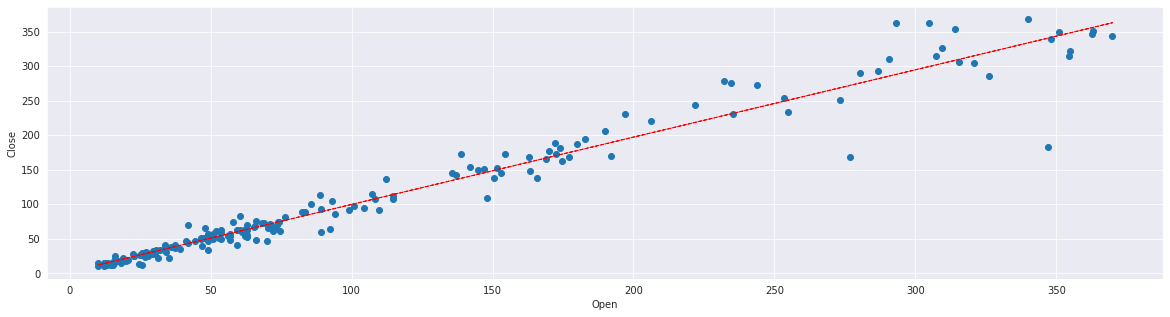

In [ ]:
# Chart - 7 visualization code
# scatter plot to see the relationship between open & close variables
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(df['Open'], df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
z = np.polyfit(df['Open'], df['Close'], 1)
y_hat = np.poly1d(z)(df['Open'])
plt.plot(df['Open'], y_hat, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

**ANS-**. scatter plot to see the relationship between open & close variables

#### Chart - 8

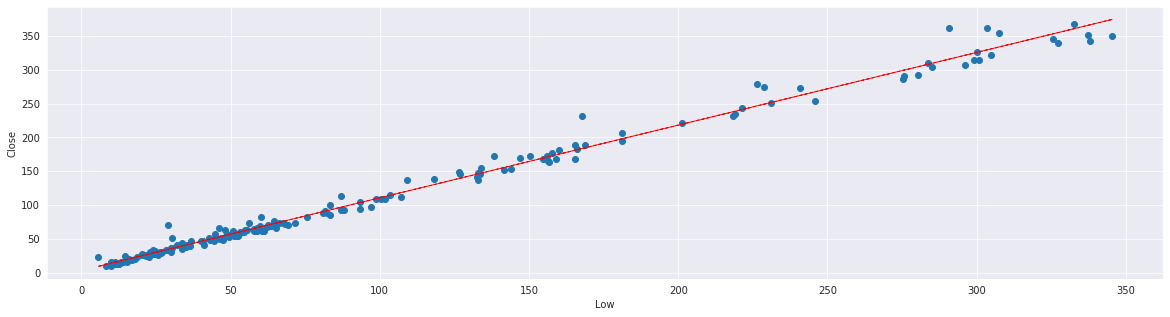

In [ ]:
# Chart - 10 visualization code

# scatter plot to see the relationship between low & close variables
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(df['Low'], df['Close'])
plt.xlabel('Low')
plt.ylabel('Close')
z = np.polyfit(df['Low'], df['Close'], 1)
y_hat = np.poly1d(z)(df['Low'])
plt.plot(df['Low'], y_hat, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

**ANS-**. scatter plot to see the relationship between low & close variables

#### Chart - 9

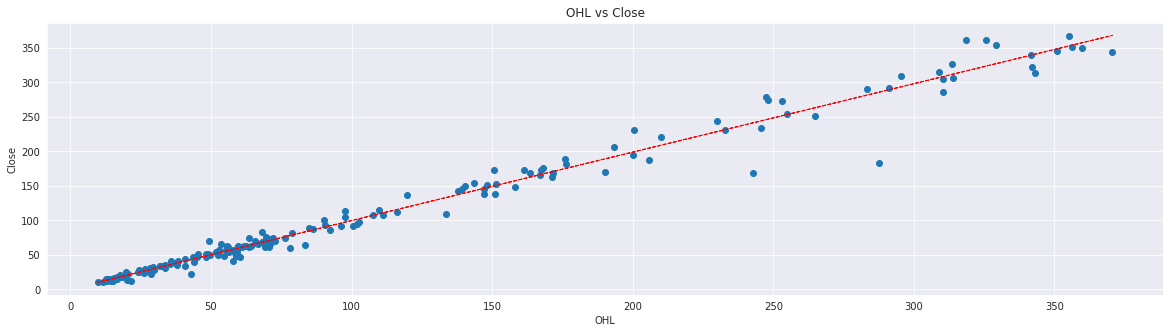

In [ ]:
# Chart - 12 visualization code
# Creating a new feature based on average of other features in the dataset
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()
# scatter plot to see the relationship between dependent & independent variables
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(df['OHL'], df['Close'])
plt.xlabel('OHL')
plt.ylabel('Close')
ax.set_title('OHL vs Close')
z = np.polyfit(df['OHL'], df['Close'], 1)
y_hat = np.poly1d(z)(df['OHL'])
plt.plot(df['OHL'], y_hat, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

**ANS-**. scatter plot to see the relationship between dependent & independent variables

#### Chart - 10

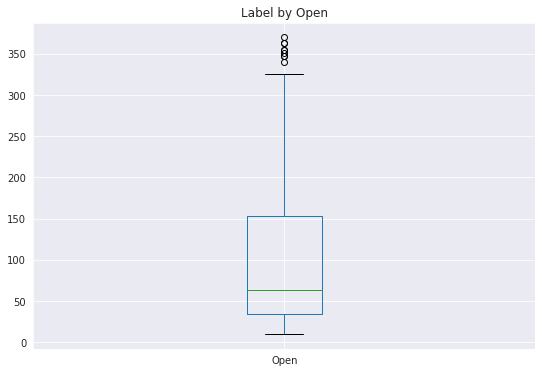

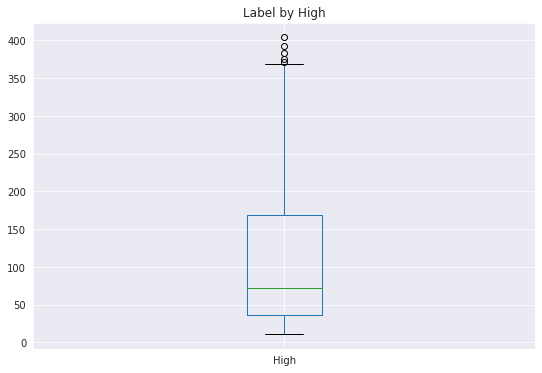

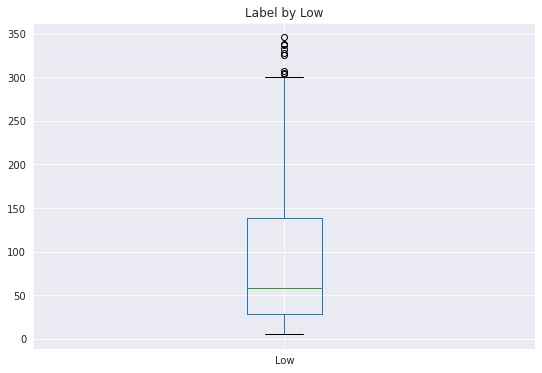

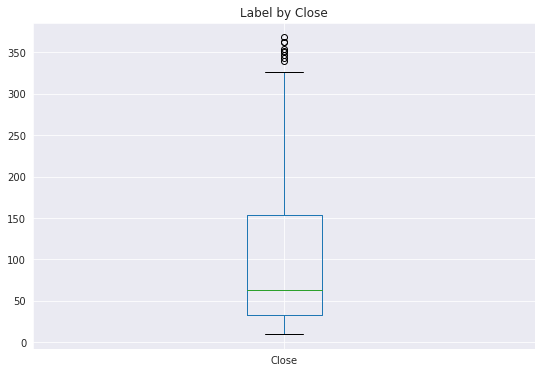

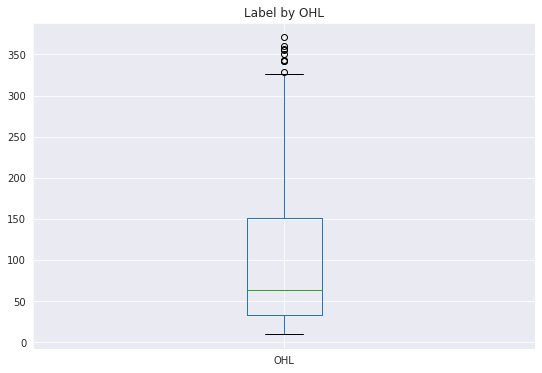

In [ ]:
# Chart - 13 visualization code


# Visualizing code of box plot for each columns to know the data distibution
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

##### 1. Why did you pick the specific chart?

**ANS-**.  Visualizing code of box plot for each columns to know the data distibution

#### Chart - 11 

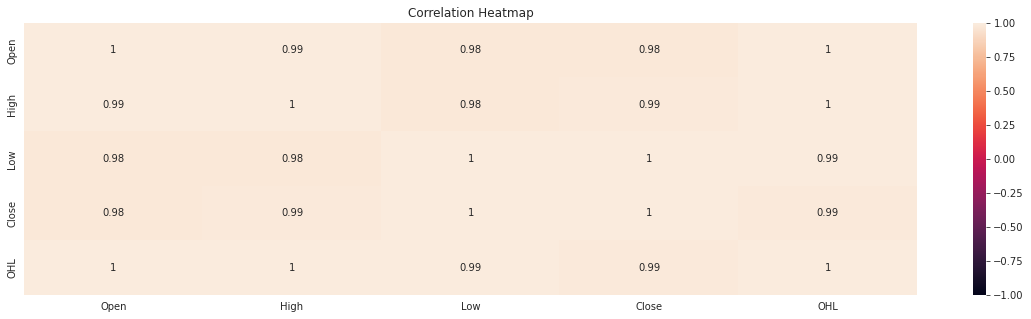

In [ ]:
# Chart -  visualization code
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

##### 1. Why did you pick the specific chart?

**ANS-**. checking for existence of corelation

##### 2. What is/are the insight(s) found from the chart?

**ANS-** Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

#### Chart - 12 - 

In [ ]:
# visualization code
fig = px.line(df, df['Date'], df['Open'], title='Monthly opening price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

##### 1. Why did you pick the specific chart?

**ANS-**. for analyzing closing price of stock at different date

##### 2. What is/are the insight(s) found from the chart?

**ANS-** price has been increased every year till 2018 after 2018 it has been going down. 

#### Chart - 13 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
fig = px.line(df, df['Date'], df['High'], title='Monthly High price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

##### 1. Why did you pick the specific chart?

 **ANS-**. for analyzing closing price of stock at different date

##### 2. What is/are the insight(s) found from the chart?

**ANS-** price has been increased every year till 2018 after 2018 it has been going down. 

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Open,High,Low,Close,OHL
Open,1.00,0.99,0.98,0.98,1.00
High,0.99,1.00,0.98,0.99,1.00
Low,0.98,0.98,1.00,1.00,0.99
Close,0.98,0.99,1.00,1.00,0.99
OHL,1.00,1.00,0.99,0.99,1.00


##### 1. Why did you pick the specific chart?

**ANS-**. for corelating heatmap

#### Chart - 15 - Pair Plot 

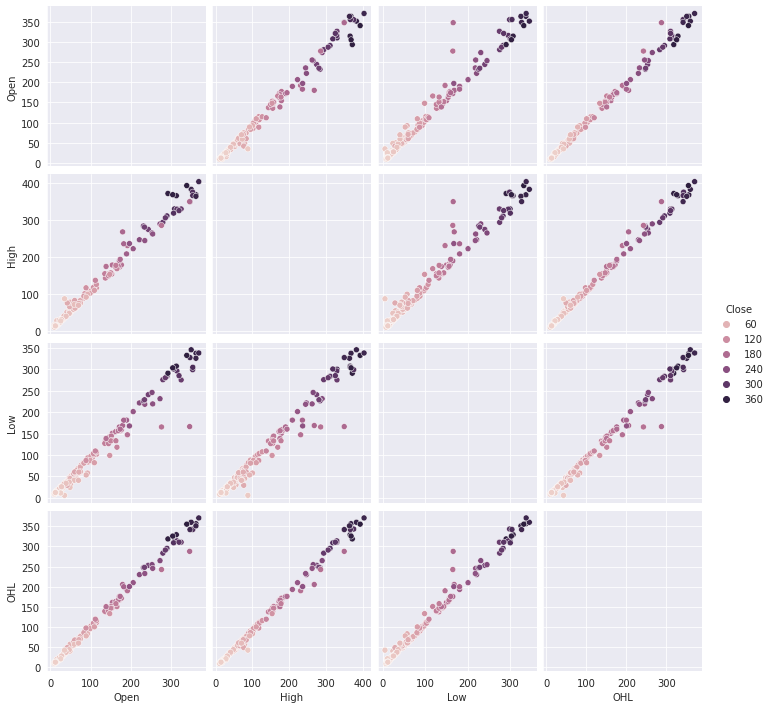

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="Close")

##### 1. Why did you pick the specific chart?

**ANS-**. for getting pairs in details

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Date     0
Open     0
High     0
Low      0
Close    0
OHL      0
dtype: int64


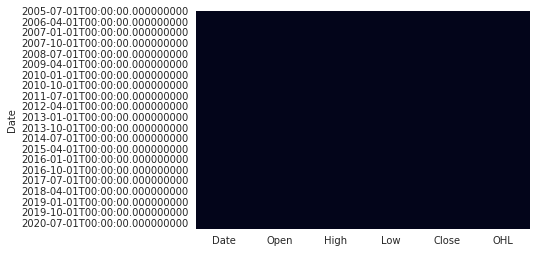

In [ ]:
# Handling Missing Values & Missing Value Imputation
df1=df.copy()
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

As there is no missing values so we will direct split the data using time series

### 2. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
tscv = TimeSeriesSplit(n_splits=5)



In [ ]:
# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

### 3. Handling Imbalanced Dataset

In [ ]:
# choose appropriate dependent and independent variables
y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

## ***7. ML Model Implementation***

### ML Model - 1

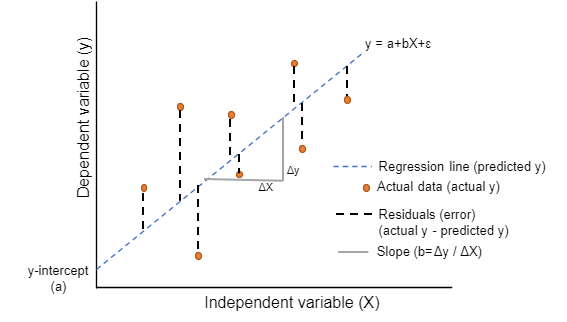

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Checking the coefficients


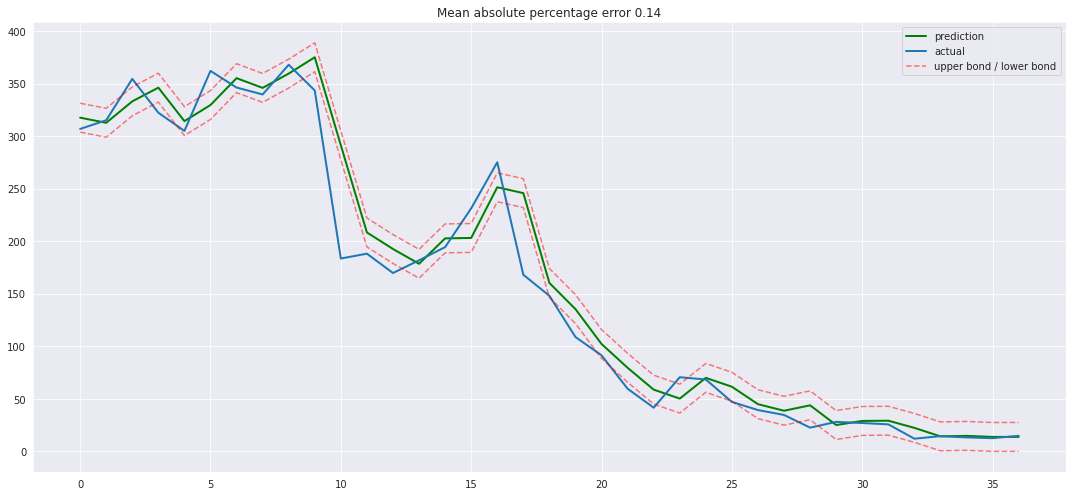

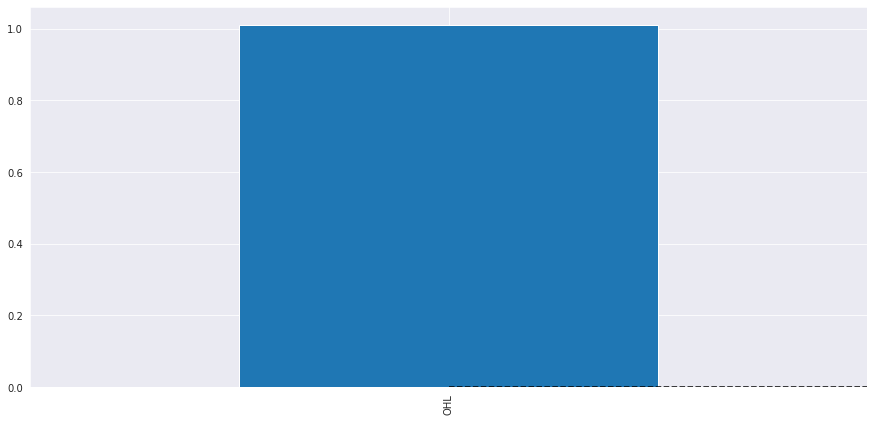

In [ ]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

# function to plot coefficients   
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

####  Cross- Validation & Hyperparameter Tuning

mean absolute error: 16.87

mean squared error: 714.43

root mean squared error: 26.73

r2_score: 0.96

mean absolute percentage error: 0.14





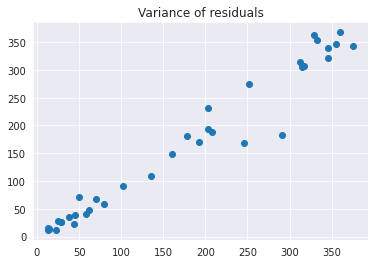

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# make predictions
lr_y_pred = lr.predict(X_test)

# evaluate predictions
lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))

# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

### ML Model - 2

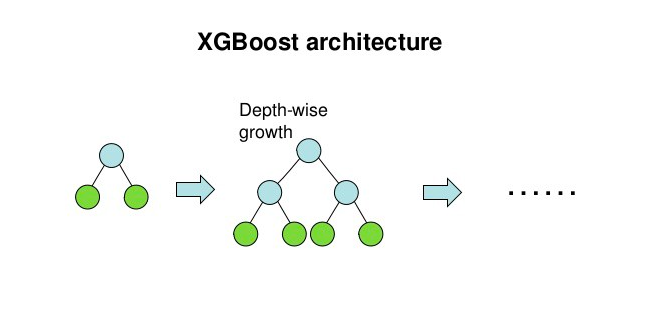

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the xgb_boostClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
# set up the model pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# initialize and fit xgboost regressor
model = XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit XGBoost regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[05:55:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The computational cost for finding the best fit XGBoost regressor model: 2.63 minutes

Best score: 52.64205005381509

Best parameters: {'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 1000, 'reg_alpha': 1.1, 'reg_lambda': 1.3, 'subsample': 0.8}


In [ ]:
# best fit model
xgb = model.best_estimator_

[05:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


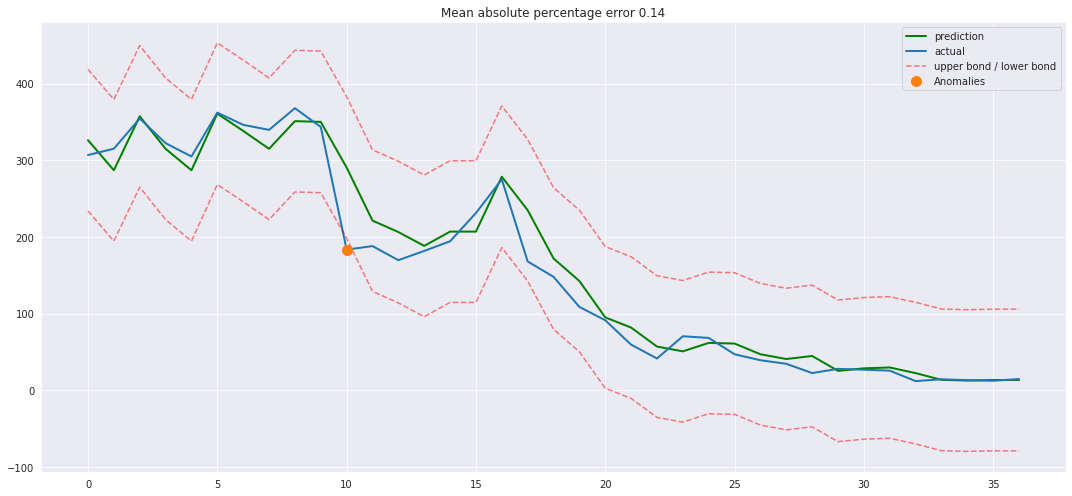

In [ ]:
# evaluate the model
plotModelResults(xgb, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)

### ML Model - random forests regressor

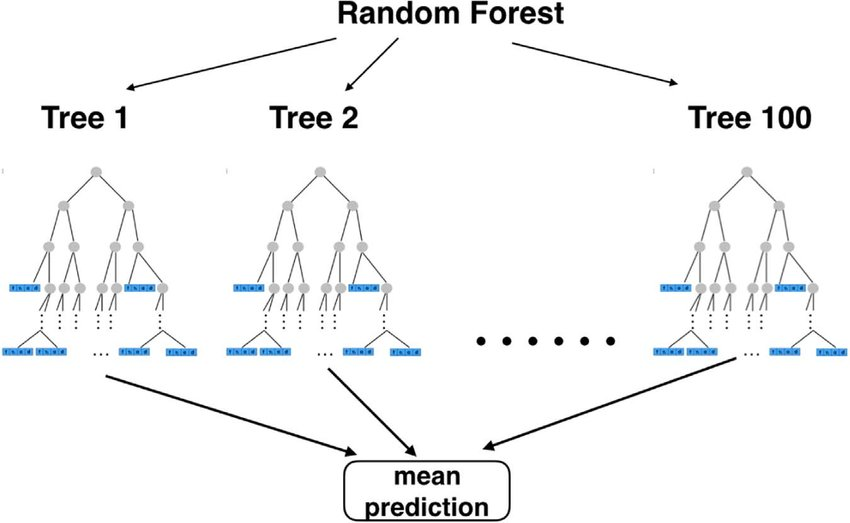

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# initialize and fit random forests regressor
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,150,200],
     'max_depth': [20,30,50,100]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit random forest regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The computational cost for finding the best fit random forest regressor model: 0.18 minutes

Best score: 52.4509310428456

Best parameters: {'max_depth': 30, 'n_estimators': 200}


#### 2. Cross- Validation & Hyperparameter Tuning

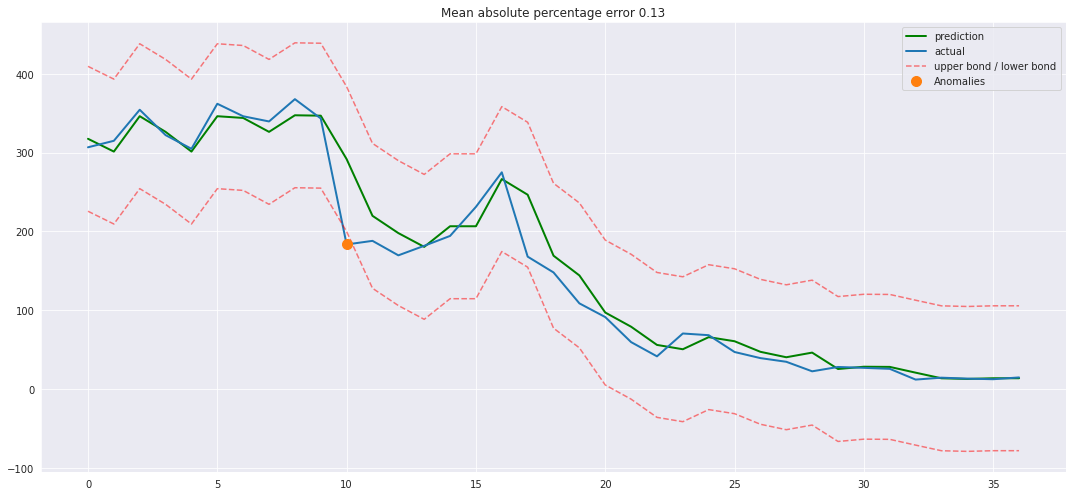

In [ ]:
# best fit model
rfr = model.best_estimator_

# Fit the Algorithm
# evaluate the model
plotModelResults(rfr, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
# Predict on the model

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

# 1. We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.

# 2. we have splitted the data using time series 

# 3. A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.

# 4. Regression models namely random forest regressor and  xgboost regressor were built




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***